# ДЗ: Знакомство с нейронными сетями

In [1]:
import graphviz
import sympy
sympy.init_printing(use_unicode=True)

### №1
Вспомните рассмотренные на занятии функции активации нейронной сети.
Чему равна производная сигмоидной функции активации? Выразите ответ через сигмоидную функцию.

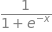

In [2]:
x = sympy.symbols("x")
sigmoid = 1/(1+sympy.exp(-x))
sigmoid

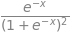

In [3]:
dsigm = sympy.diff(sigmoid, x)
dsigm

In [4]:
Sigmoid = sympy.symbols("Sigmoid")
dsigm.subs(sigmoid, Sigmoid)

### №2
Пусть на вход искусственному нейрону подается число x, а затем домножается на вес связи 
$w_1$, внутри нейрона прибавляется вес-смещение $w_0$ и после этого применяется функция активации Relu. 

Нарисуйте схему такого нейрона.

Допустим, что в наш нейрон подали вход x=4 и получили ответ 1, потом подали вход x=2  и получили ответ 3.

Чему равны веса $w_1, w_0$?

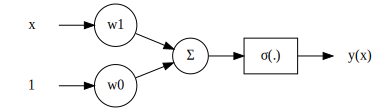

In [5]:
neuron = graphviz.Source('digraph G{ \
                            rankdir=LR; \
                            { node [shape = "none"]; x; 1; "y(x)"; } \
                            { node [shape = "circle"]; w1; w0; Σ } \
                            { node [shape = "rect"]; "σ(.)" } \
                            "x" -> "w1"; \
                            "1" -> "w0"; \
                            "w1" -> "Σ"; \
                            "w0" -> "Σ"; \
                            "Σ" -> "σ(.)"; \
                            "σ(.)" -> "y(x)";}')
neuron

In [6]:
w1, w0 = sympy.symbols("w1 w0")
sympy.solve([w1*4+w0-1, w1*2+w0-3], [w1,w0])